# Simple statistical inference: an example of using the Pearson correlation coefficient
The Pearson coefficient is used to check the correlation between two continuous variables.

Data source: https://www.kaggle.com/saurabh00007/diabetescsv

In [1]:
import pandas as pd
df = pd.read_csv('c:/1/diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


The aim of the study is to check if (H1) there is a statistically significant positive correlation between blood pressure and body weight of patients.
- H0 - there is no significant statistical relationship between body weight and blood pressure
- H1 - there is a significant statistical relationship between body weight and blood pressure

### <span style = "color: blue"> Data completeness check </span>

It is noted that some information such as blood pressure or body temperature is zero. It treats as no data.

In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The data is complete but there is a lack of data in the form of zeros. I replace these zeros with shortcomings.

In [3]:
import numpy as np

df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.NaN)

In [4]:
print('Number of rows and columns: ',df.shape)
df.isnull().sum()

Number of rows and columns:  (768, 9)


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Deleting records with missing data.

In [5]:
df = df.dropna(how ='any')

In [6]:
print('Number of rows and columns: ',df.shape)
df.isnull().sum()

Number of rows and columns:  (336, 9)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now there is much less data but better quality.

### <span style="color:blue">Pearson correlation coefficient</span>
The Pearson correlation coefficient [1] measures the linear relationship between two datasets. The calculation of the p-value relies on the assumption that each dataset is normally distributed. (See Kowalski [3] for a discussion of the effects of non-normality of the input on the distribution of the correlation coefficient.) Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation.

Pearson correlation coefficient returns a double tuple consisting of a correlation coefficient and the corresponding p value:
The correlation coefficient can be from -1 to +1.
The null hypothesis is that two variables are uncorrelated. The p value is a number from zero to one that represents the probability that your data would have arisen if the null hypothesis were true.

### p- value
A low p-value (such as 0.01) is considered evidence that the null hypothesis can be "Rejected". Statisticians say p-value of 0.01 is "very significant" or say "data is significant at 0.01"
A competent researcher studying a hypothetical relationship will determine the p value before empirical study. Usually 0.01 or 0.05 are used. If the test data give a p value less than the predetermined value, the researcher claims that their study is significant and allows them to reject the null hypothesis and conclude that the relationship really exists.
In the case of the relationship between alcohol consumption and breast cancer, the correlation coefficient is about 0.4, with a very low p value - almost equal to zero. This tells us that the relationship is statistically significant (because it is less than 0.05 or 0.01)

### Assuming a normal distribution
It is desirable that the correlated variables have distributions close to the normal distribution. However, it is not obligatory. We can also calculate Pearson's r factor for variables with a broken assumption with normal distribution. Attention should also be paid to outliers that may disturb the obtained correlation result.

### <span style = "color: blue"> A scatter plot made to capture outliers </span>

In [7]:
import seaborn as sns

sns.jointplot(x='Insulin', y='BMI', data=df)

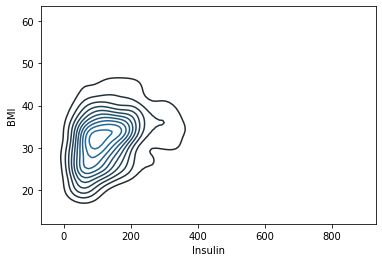

In [8]:
sns.kdeplot(df.Insulin, df.BMI)

### <span style = "color: blue"> Deleting extreme values in the 'Insulin' and 'BMI' columns </span>

In [9]:
df['Insulin'] = df['Insulin'].apply(lambda x: np.nan if x > 600 else x)
df['BMI'] = df['BMI'].apply(lambda x: np.nan if x > 50 else x)

df = df.dropna(how ='any')

Scatter plot after truncating outliers.

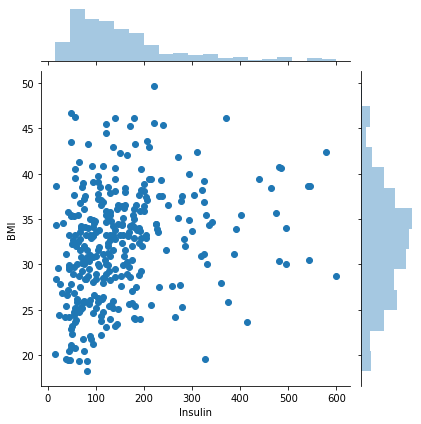

In [10]:
sns.jointplot(x='Insulin', y='BMI', data=df)

### <span style="color:blue">Pearson correlation coefficient</span>

In [11]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
import scipy

PKP = scipy.stats.pearsonr(df['Insulin'], df['BMI'])
PKP = np.round(PKP, decimals=5)
print(PKP)

[0.27494 0.     ]


There is a positive correlation between the patients' insulin levels in the blood and the BMI body mass index. Therefore, the null hypothesis is rejected in favor of the alternative hypothesis. The correlation phenomenon is statistically significant because the p-value is less than 0.01.

### <span style = "color: blue"> Dispersion chart for correlations </span>

Text(0.5, 1.0, 'Scatterplot for blood insulin levels and BMI')

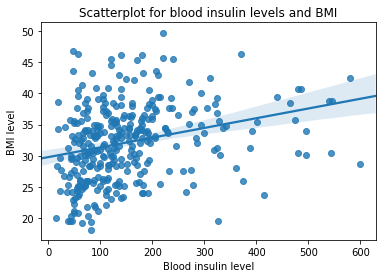

In [13]:
import matplotlib.pyplot as plt

scat2= sns.regplot(x='Insulin', y='BMI', data=df)
plt.xlabel('Blood insulin level')
plt.ylabel('BMI level')
plt.title('Scatterplot for blood insulin levels and BMI')

### <span style = "color: blue"> Forecasting based on Pearson's correlation coefficient </span>

Knowing the BMI level, we can predict the level of insulin in the blood and vice versa. The correlation level here is 0.275.
The correlation square of 0.275 with us gives us value r2 = 0.0756.

So we can predict 7.5% volatility, which means that 92% volatility is not predictable based on the Pearson correlation coefficient.